# Estimating regression fits

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. We previously discussed`functions that can accomplish this by showing the joint distribution of two variables. It can be very helpful, though, to use statistical models to estimate a simple relationship between two noisy sets of observations. The functions discussed in this chapter will do so through the common framework of linear regression.

In the spirit of Tukey, the regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use `statsmodels`. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
np.random.seed(sum(map(ord, "regression")))

## Functions for drawing linear regression models
----------------------------------------------

The two functions that can be used to visualize a linear fit are `regplot` and `lmplot`.

In the simplest invocation, both functions draw a scatterplot of two variables, ``x`` and ``y``, and then fit the regression model ``y ~ x`` and plot the resulting regression line and a 95% confidence interval for that regression:

In [2]:
tips = sns.load_dataset("tips")
print(tips.info())
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

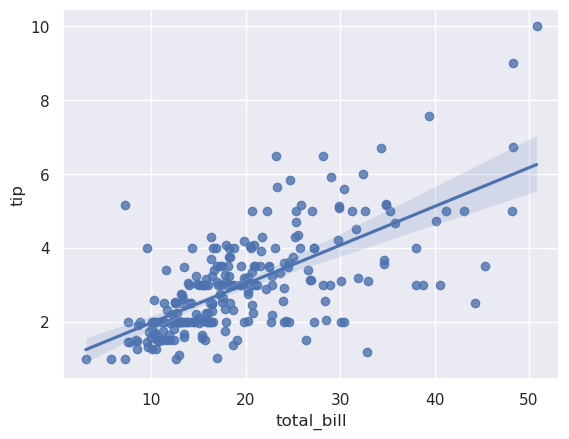

In [3]:
# Simple linear regression plot
sns.regplot(tips, x="total_bill", y="tip") #use sns.regplot to create a scatter plot with a linear regression line, tips is the dataframe, x and y are the column names

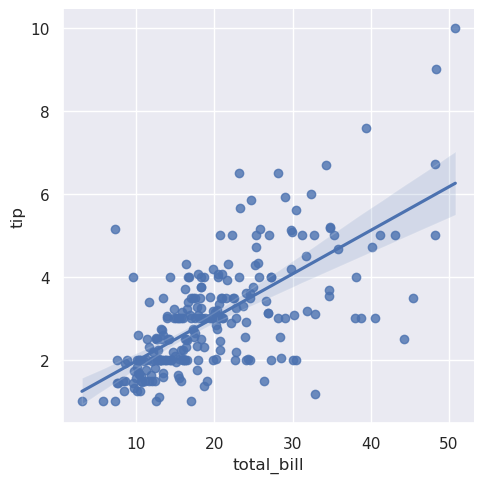

In [4]:
sns.lmplot(data=tips,x="total_bill", y="tip", #use sns.lmplot to create a scatter plot with a linear regression line, tips is the dataframe, x and y are the column names
             # hue="smoker", #color by smoker status
)

These functions draw similar plots, but `regplot` is an `axes-level function`, and `lmplot` is a figure-level function. Additionally, `regplot` accepts the ``x`` and ``y`` variables in a variety of formats including simple numpy arrays, `pandas.Series` objects, or as references to variables in a `pandas.DataFrame` object passed to `data`. In contrast, `lmplot` has `data` as a required parameter and the `x` and `y` variables must be specified as strings. Finally, only `lmplot` has `hue` as a parameter. Try setting the hue in the regplot to see what happens. Also, hover your cursor over the function to see the function options for customization.

The core functionality is otherwise similar, though, so this tutorial will focus on `lmplot`.

An option  to map a regression line to categorical data is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

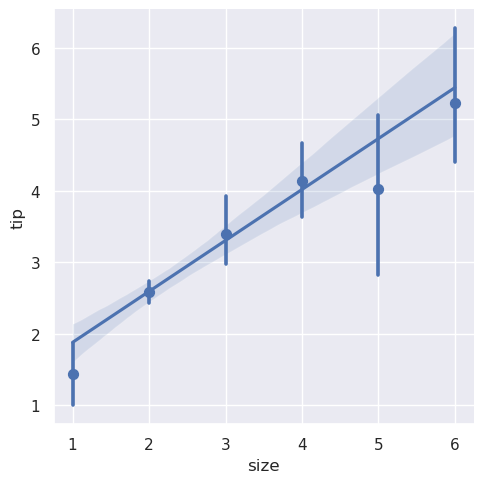

In [5]:
#plotting a regression with to categoricatl or integer data
sns.lmplot(data=tips, x="size", y="tip", #dataset, x and y column names
           x_estimator=np.mean) #use mean of tip for each size to plot the regression

## Fitting different kinds of models
---------------------------------

The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. The `Anscombe's quartet` dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. For example, in the first case, the linear regression is a good model:

In [6]:
anscombe = sns.load_dataset("anscombe")
print(anscombe.info())
anscombe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
None


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


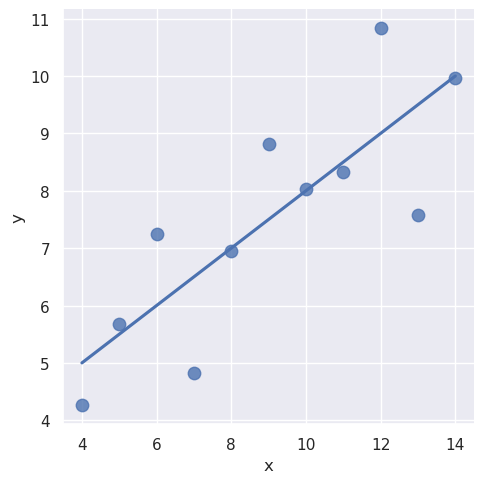

In [7]:
#make an Lmplot of anscombe dataset, dataset I
sns.lmplot(data=anscombe.query("dataset == 'I'"), #filter dataset to only I
           x="x", y="y",    #x and y column names
           ci=None, #no confidence interval
           scatter_kws={"s": 80}) #size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

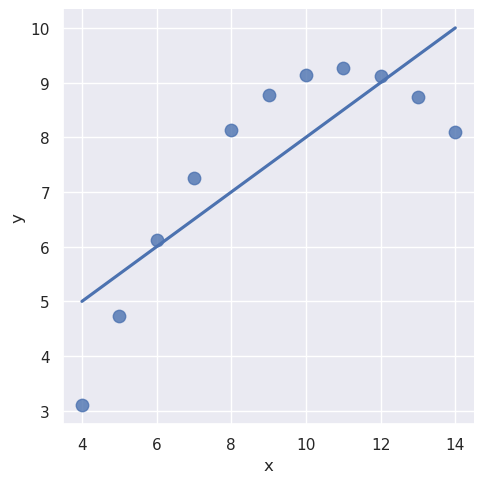

In [8]:
sns.lmplot( data=anscombe.query("dataset == 'II'"), #filter dataset to only II
           x="x", y="y", #x and y column names
           ci=None, #no confidence interval
           scatter_kws={"s": 80}) #size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

In the presence of these kind of higher-order relationships, `lmplot` and `regplot` can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

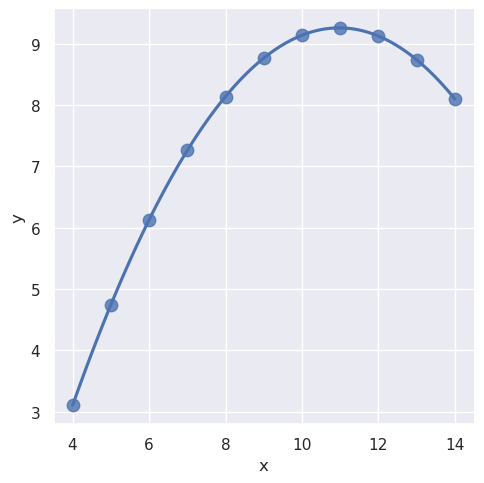

In [9]:
sns.lmplot(data=anscombe.query("dataset == 'II'"), #filter dataset to only II
           x="x", y="y", #x and y column names
           order=2, #fit a polynomial regression of order 2, order = 1 is linear and is default
           ci=None, #no confidence interval
           scatter_kws={"s": 80}) #size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

A different problem is posed by "outlier" observations that deviate for some reason other than the main relationship under study:

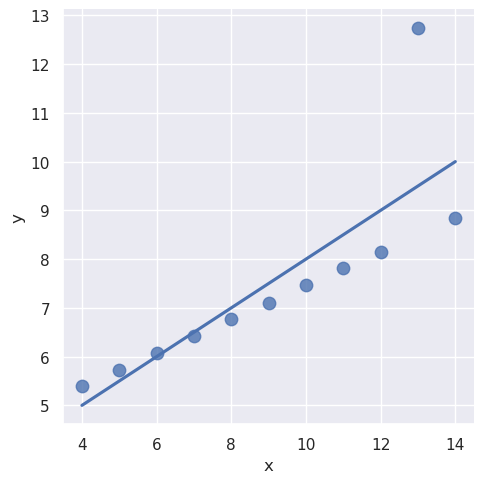

In [10]:
sns.lmplot(data=anscombe.query("dataset == 'III'"), #filter dataset to only III
           x="x", y="y", #x and y column names
           ci=None, #no confidence interval
           scatter_kws={"s": 80})# size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

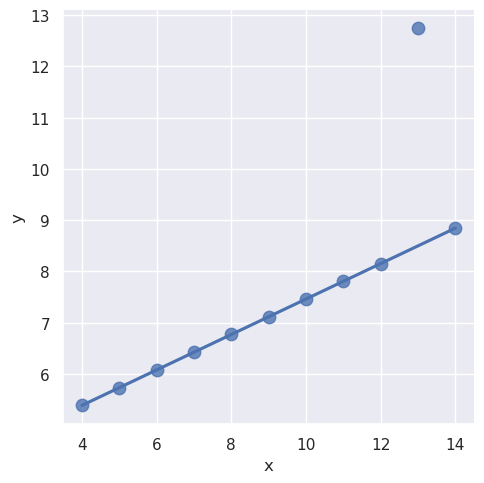

In [11]:
sns.lmplot( data=anscombe.query("dataset == 'III'"), #filter dataset to only III
           x="x", y="y", #x and y column names
           robust=True, # fit a robust regression to reduce the influence of outliers
           ci=None, #no confidence interval
           scatter_kws={"s": 80})# size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

When the ``y`` variable is binary, simple linear regression also "works" but provides implausible predictions:

In [ ]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15 #create a new column big_tip that is True if tip/total_bill > 0.15, else False
tips.head()

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False


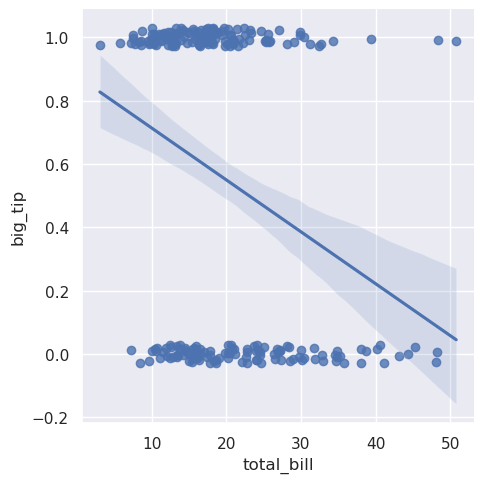

In [ ]:
#plotting a regression with a categorical variable on the y axis
sns.lmplot(data=tips, x="total_bill", y="big_tip", #dataset, x and y column names
           y_jitter=.03) #add some jitter to the y axis to better visualize the points, since these will be only 0 and 1

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of ``y = 1`` for a given value of ``x``:

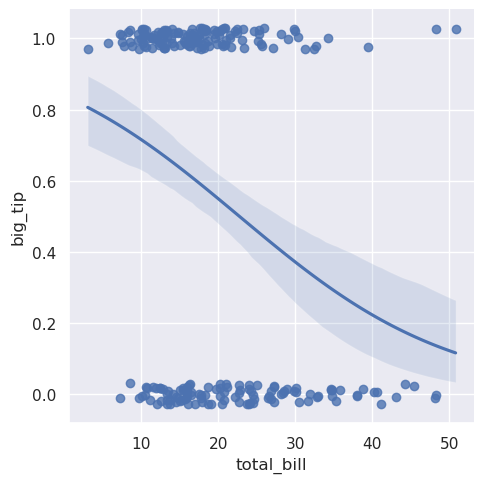

In [16]:
sns.lmplot(data=tips,x="total_bill", y="big_tip", #dataset, x and y column names
           logistic=True, #fit a logistic regression, logistic regression is used when y is binary
           #ci=None, #no confidence interval, if not confidence interval the plot will be faster
           y_jitter=.03) #add some jitter to the y axis to better visualize the points, since these will be only 0 and 1

Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well). As the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ``ci=None``).

An altogether different approach is to fit a nonparametric regression using a `lowess smoother`. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all.

`LOWESS (Locally Weighted Scatterplot Smoothing)` is a non-parametric regression method used to find a smooth line of best fit for data that doesn't follow a simple straight line.

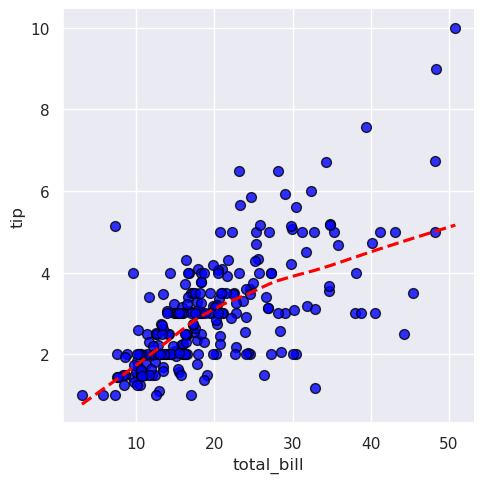

In [22]:
sns.lmplot(data=tips,x="total_bill", y="tip", #dataset, x and y column names
           lowess=True, #fit a non-parametric lowess regression
           scatter_kws={"s": 50, 'color': "blue", "edgecolor": "black"}, #size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them
           line_kws={"color": "red", "linestyle": "--"} #color and linestyle of the regression line, not the use of dict format to specify them
           )

The `residplot` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around ``y = 0``:

<Axes: xlabel='x', ylabel='y'>

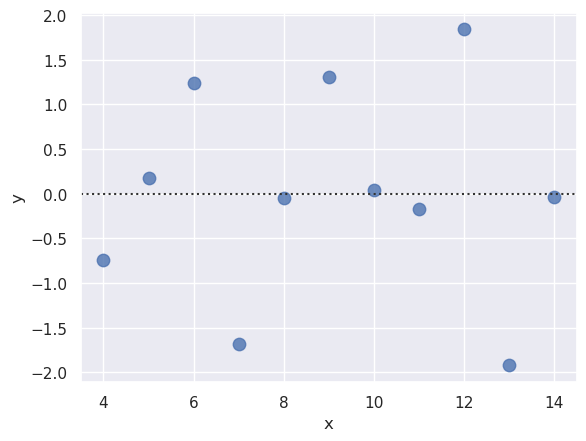

In [ ]:
#residual plot
sns.residplot(data=anscombe.query("dataset == 'I'"), #filter dataset to only I
              x="x", y="y", #x and y column names
              scatter_kws={"s": 80}) #size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

<Axes: xlabel='x', ylabel='y'>

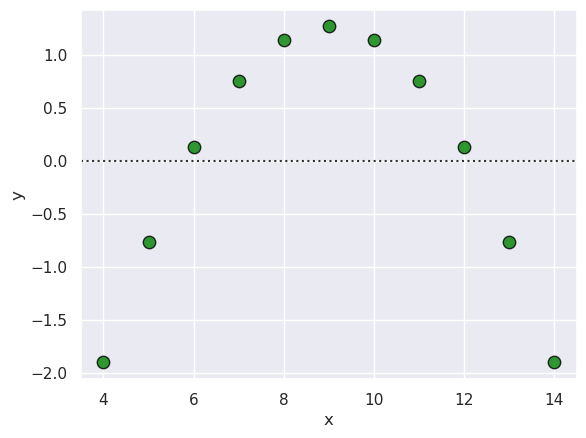

In [ ]:
sns.residplot(data=anscombe.query("dataset == 'II'"), #filter dataset to only II
              x="x", y="y", #x and y column names
              scatter_kws={"s": 80, 'color': 'green', 'edgecolor': 'black'}) #size of scatter points, there are multiple keyword arguments for scatter_kws, we use dict format to specify them

## Conditioning on other variables
-------------------------------

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is "how does the relationship between these two variables change as a function of a third variable?" This is where the main differences between `regplot` and `lmplot` appear. While `regplot` always shows a single relationship, `lmplot` combines `regplot` with `FacetGrid` to show multiple fits using `hue` mapping or faceting.

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

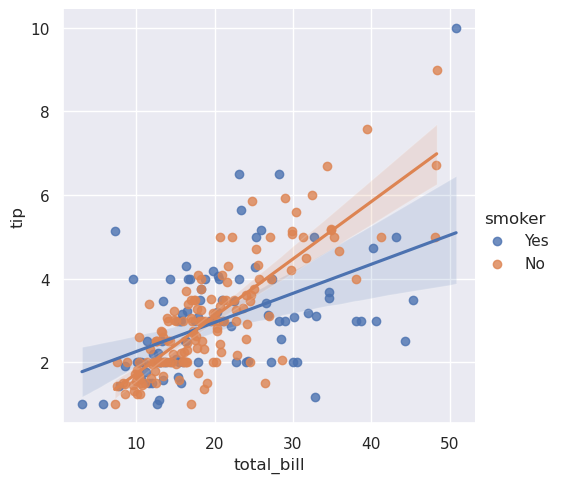

In [ ]:
sns.lmplot(data=tips,x="total_bill", y="tip", #dataset, x and y column names
           hue="smoker") #color by smoker status, this creates two regression lines, one for each category

Unlike `relplot`, it's not possible to map a distinct variable to the style properties of the scatter plot, but you can redundantly code the `hue` variable with marker shape:

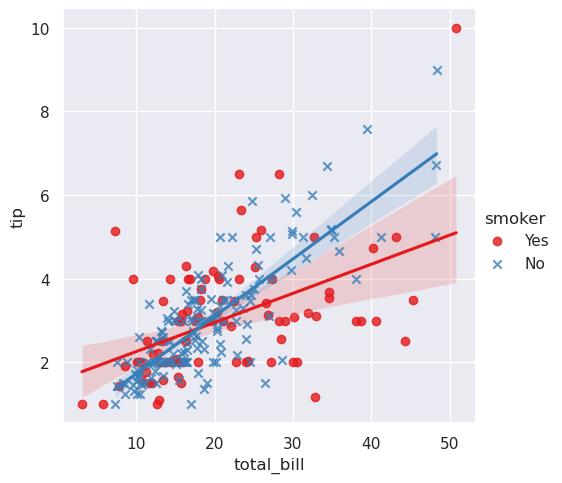

In [ ]:
sns.lmplot(data=tips,x="total_bill", y="tip", #dataset, x and y column names
           hue="smoker", #color by smoker status, this creates two regression lines, one for each category
           markers=["o", "x"], #different markers for each category, we have two so we use a list of two markers
           palette="Set1") #use the palette argument to set the colors for each category

To add another variable, you can draw multiple "facets" with each level of the variable appearing in the rows or columns of the grid:

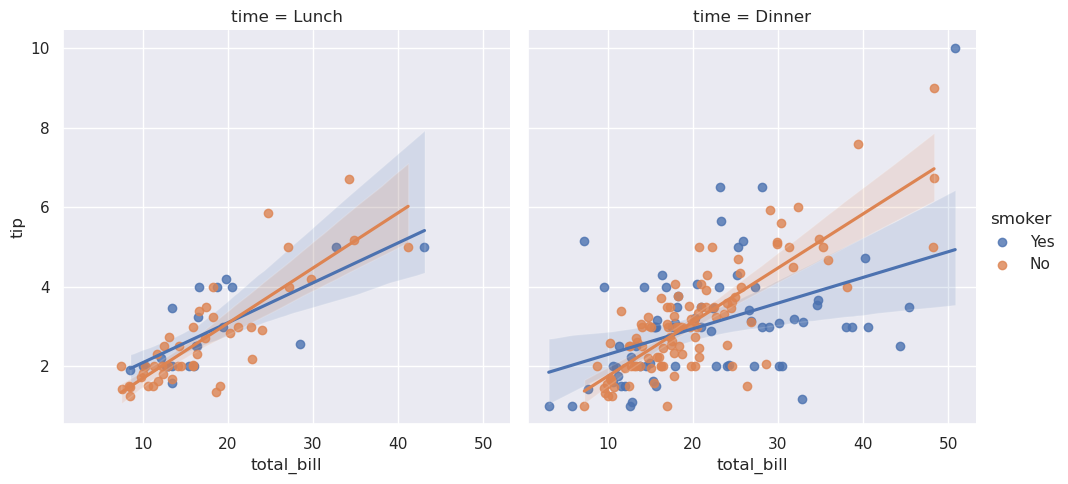

In [27]:
sns.lmplot(data=tips,x="total_bill", y="tip", #dataset, x and y column names
           hue="smoker", #color by smoker status, this creates two regression lines, one for each category
           col="time") #create separate plots for each time category

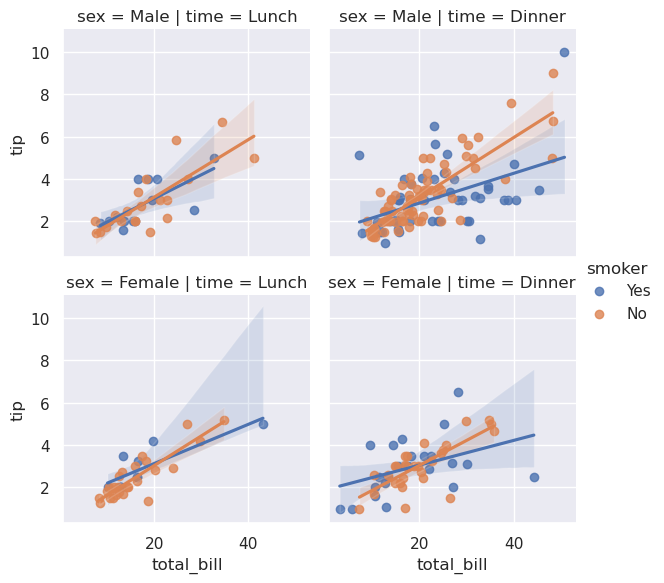

In [28]:
sns.lmplot( data=tips, x="total_bill", y="tip", #dataset, x and y column names
           hue="smoker", #color by smoker status, this creates two regression lines, one for each category
           col="time", #create separate plots for each time category
           row="sex", #create separate plots for each sex category
           height=3)# set the height of each plot

Plotting a regression in other contexts
---------------------------------------

A few other seaborn functions use `regplot` in the context of a larger, more complex plot. The first is the `jointplot` function that we introduced in the `distributions tutorial`. In addition to the plot styles previously discussed, `jointplot` can use `regplot` to show the linear regression fit on the joint axes by passing ``kind="reg"``:

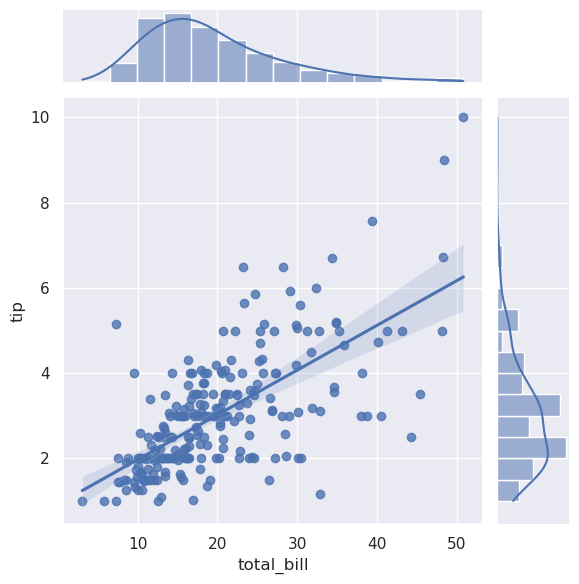

In [ ]:
#jointplot with regression
sns.jointplot(data=tips,x="total_bill", y="tip", #dataset, x and y column names
              kind="reg") #kind of plot, "reg" is for regression plot

Using the `pairplot` function with ``kind="reg"`` combines `regplot` and `PairGrid` to show the linear relationship between variables in a dataset. Take care to note how this is different from `lmplot`. In the figure below, the two axes don't show the same relationship conditioned on two levels of a third variable; rather, `PairGrid` is used to show multiple relationships between different pairings of the variables in a dataset:

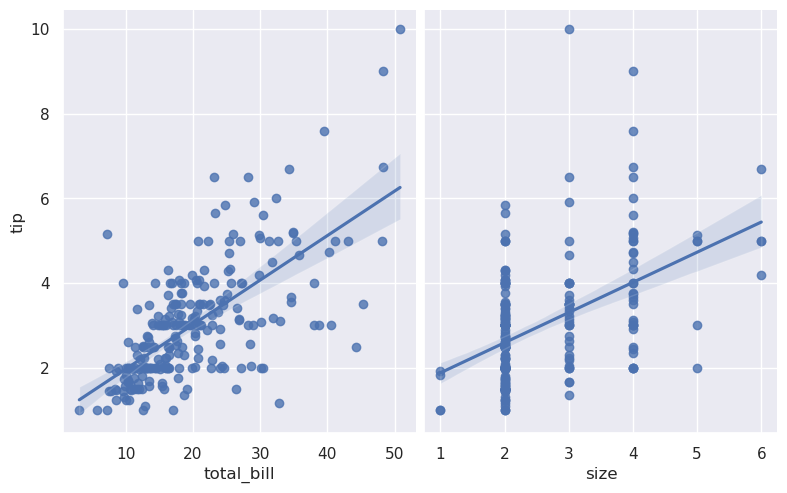

In [34]:
#pairplot with regression
sns.pairplot(tips, #dataset
             x_vars=["total_bill", "size"], #x column names, note we can pass a list of column names
             y_vars="tip",  #y column names, since we have only one y variable we can pass a string instead of a list
             #hue="smoker", #we can add the hue argument to color by smoker status
             height=5, #height of each plot
             aspect=.8, # aspect ratio of each plot
             kind="reg") #kind of plot, "reg" is for regression plot

Conditioning on an additional categorical variable is built into both of these functions using the ``hue`` parameter: